In [8]:
import logging 
from matplotlib import pyplot as plt 
import pandas as pd 
import os
import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace  import Workspace
from azureml.core.dataset import Dataset 
from azureml.core.datastore import Datastore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score # evaluation metric
from termcolor import colored as cl
#import neccassry library 

In [2]:
ws = Workspace.from_config()


# choose a name for experiment
experiment_name = "automl-classification-card-remote"

experiment = Experiment(ws, experiment_name)

output = {}
output["Subscription ID"] = ws.subscription_id
output["Workspace"] = ws.name
output["Resource Group"] = ws.resource_group
output["Location"] = ws.location
output["Experiment Name"] = experiment.name
output["SDK Version"] = azureml.core.VERSION
pd.set_option("display.max_colwidth", None)
outputDf = pd.DataFrame(data=output, index=[""])
outputDf.T

,
Subscription ID,ff2d2126-f4aa-459f-b255-4420677f910a
Workspace,fraud-detection-system
Resource Group,azure-2022-project
Location,eastus
Experiment Name,automl-classification-card-remote
SDK Version,1.42.0


In [3]:
dataset = pd.read_csv('creditcard.csv')
dataset.drop('Time', axis = 1, inplace = True) #drop the time col since it has no effect on the training 

print(dataset.head()) #seeing the first 5 row by removing the .head() method 

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [4]:
sc = StandardScaler() #normilze the data and print the first 10 rows
amount = dataset['Amount'].values

dataset['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(dataset['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [5]:
#split the the data into treain and test 
x_df = dataset.drop('Class', axis = 1).values
y_df = dataset['Class'].values
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=66)
print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[ 2.07398156 -1.08019173 -0.84983549 -0.93490325 -0.85884673 -0.42174188
  -0.84004521 -0.03493837 -0.24233017  0.90508388  0.62255056 -0.01247873
  -0.15530252 -0.09906087 -0.56978289  1.25189967 -0.08051638 -0.8415785
   0.9049527   0.03612506  0.2585561   0.68690653  0.09754011 -0.3775487
  -0.16654333 -0.17654644 -0.01442729 -0.05949748 -0.14732795]]
X_test samples :  [[-0.90410246  1.3882083  -0.31581581 -1.01263416  0.50548654 -0.64873059
   0.77192264  0.05374389  0.60169684  1.02065154  0.32144515  0.34763215
  -0.67202546  0.13429155 -0.93030693  0.1904936  -0.82903843 -0.0800802
   0.27178242  0.4460647  -0.37197473 -0.69262587  0.04680783 -0.5331425
  -0.27217316  0.17093311  0.65064029  0.35557124 -0.34927129]]
y_train samples :  [False False False False False False False False False False False False
 False False False False False False False False]
y_test samples :  [False False False False False False False False False False False False
 False False F

In [6]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))


Accuracy score of the KNN model is 0.9994733330992591


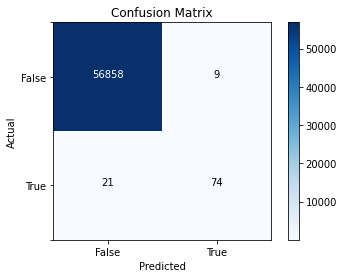

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

cf = confusion_matrix(y_test,knn_yhat)
plt.imshow(cf, cmap=plt.cm.Blues, interpolation="nearest")
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
class_labels = ["False", "True"]
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks([-0.5, 0, 1, 1.5], ["", "False", "True", ""])
# plotting text value inside cells
thresh = cf.max() / 2.0
for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    plt.text(
        j,
        i,
        format(cf[i, j], "d"),
        horizontalalignment="center",
        color="white" if cf[i, j] > thresh else "black",
    )
plt.show()